# Analysing Baseball game Data
## Zsombor Hegedűs & Brúnó Helmeczy

#### Prepared for: Coding 3: Data Analysis & Management with Python 
#### Instructor: Eszter Somos 
#### MSc Business Analytics @ Central European University
#### [Github](https://github.com/zsomborh/analyse_baseball_matches) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Games = pd.read_csv("games.csv")
Atbats = pd.read_csv("atbats.csv")
Pitches = pd.read_csv("pitches.csv")

In [3]:
for df in [Games, Atbats, Pitches]:
    print(df.columns)

Index(['attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'g_id', 'home_final_score', 'home_team', 'start_time', 'umpire_1B',
       'umpire_2B', 'umpire_3B', 'umpire_HP', 'venue_name', 'weather', 'wind',
       'delay'],
      dtype='object')
Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')
Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [4]:
# Games['g_id'] == Atbats['g_id']
# Pitches['ab_id'] == Atbats['ab_id']

Games = Games[['g_id','attendance','venue_name',
               'date','start_time', 'elapsed_time','delay','weather','wind',
               'away_team','home_team','away_final_score','home_final_score']]
Atbats = Atbats[['ab_id','event','g_id','inning','o','p_score','p_throws','stand','top']]
Pitches = Pitches[['ab_id','type','b_count','s_count','outs',
                   'pitch_type','pitch_num','spin_rate','start_speed','end_speed',
                   'code','zone']]

# Merge dataframes:
Pitches_n_Atbats = pd.merge(Pitches,Atbats, how = 'left')
Df_Merged = pd.merge(Pitches_n_Atbats, Games, how = 'left')

Df_Merged.columns

Df_Merged.to_csv("Baseball_Merged.csv", index = False)
# Column Descriptions:
    # ab_id       - Id of at bat
    # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 
    # b_count     - Balls hit (in current round, I think)
    # s_count     - Strikes   (in current round, I think)
    # outs        - How many outs are there for the hitting team in the current inning - should be 0-2
    # pitch_type  - Should be same as type 
    # pitch_num   - Defending team can have many Nr. pitches until 3 outs are made 
    # spin_rate   - Of ball in rounds per minute (RPM
    # start_speed - Ball speed at release
    # end_speed   - Ball speed at hit 
    # code        - 
    # zone        - 
    # event       - Outcome of Pitch/Atbat - what the pitch resulted in 
    # g_id        - 
    # inning      - should be 1-9 -> Like quarters in NBA/NFL - baseball is played in 9 innings
    # o           - 
    # p_score     - 
    # p_throws    - 
    # stand       - Batter Left/Right handed stand
    # top         - Yes/No -  Innings consist of 2 halves, the "top" (first) & "bottom" (second). 
                            # In each half, one team bats until 3 outs are made, with other team playing defense. 
    # delay       - Game started late by X minutes
    # weather     - weather-description string 
    # wind        - string with windspeed inside
    # away_team
    # home_team
    # away_final_score
    # home_final_score
    # 
    # 
    # 
    



In [5]:
Df_Merged.dropna(subset = ['zone']).isna().sum()

ab_id                  0
type                   0
b_count                0
s_count                0
outs                   0
pitch_type             0
pitch_num              0
spin_rate              0
start_speed            0
end_speed              0
code                5715
zone                   0
event                  0
g_id                   0
inning                 0
o                      0
p_score                0
p_throws               0
stand                  0
top                    0
attendance             0
venue_name             0
date                   0
start_time             0
elapsed_time           0
delay                  0
weather                0
wind                   0
away_team              0
home_team              0
away_final_score       0
home_final_score       0
dtype: int64

In [6]:
Df_Merged['code'].unique()

array(['C', 'S', 'F', 'B', 'X', 'D', 'E', '*B', 'L', 'W', 'T', 'I', 'M',
       'H', 'P', 'V', 'Q', 'R', nan, 'Z'], dtype=object)

(array([4.85605025e-05, 1.47018035e-04, 2.26246297e-04, 2.64180521e-04,
        2.71506493e-04, 2.83438742e-04, 3.32045886e-04, 4.28264614e-04,
        5.57235506e-04, 6.74590992e-04, 6.35822042e-04, 4.18402295e-04,
        1.99517354e-04, 7.44080777e-05, 2.10466908e-05, 4.71564248e-06,
        9.53743517e-07, 2.94325571e-07, 1.19016898e-07, 5.14667665e-08,
        5.46834394e-08, 1.76917010e-08, 1.44750281e-08, 9.65001872e-09,
        4.82500936e-09, 1.60833645e-09, 0.00000000e+00, 0.00000000e+00,
        1.60833645e-09, 4.82500936e-09]),
 array([1.21400000e+00, 2.19148833e+02, 4.37083667e+02, 6.55018500e+02,
        8.72953333e+02, 1.09088817e+03, 1.30882300e+03, 1.52675783e+03,
        1.74469267e+03, 1.96262750e+03, 2.18056233e+03, 2.39849717e+03,
        2.61643200e+03, 2.83436683e+03, 3.05230167e+03, 3.27023650e+03,
        3.48817133e+03, 3.70610617e+03, 3.92404100e+03, 4.14197583e+03,
        4.35991067e+03, 4.57784550e+03, 4.79578033e+03, 5.01371517e+03,
        5.23165000e+03

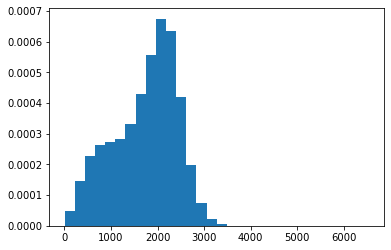

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['spin_rate'], density = True, bins = 30)


(array([1.63024801e-07, 1.63024801e-07, 1.95629762e-06, 4.89074404e-06,
        5.70586805e-06, 7.01006646e-06, 1.20638353e-05, 1.40201329e-05,
        2.11932242e-05, 2.91814394e-05, 4.82553412e-05, 7.54804830e-05,
        1.85033149e-04, 4.24679607e-04, 1.02298063e-03, 2.70441843e-03,
        6.41176543e-03, 1.09135323e-02, 1.93184390e-02, 2.76051526e-02,
        3.95613916e-02, 4.52807907e-02, 5.66840495e-02, 7.70577479e-02,
        9.29895097e-02, 5.98517844e-02, 2.16188819e-02, 2.98791856e-03,
        2.62959004e-04, 1.51613065e-05]),
 array([32.4 , 34.55, 36.7 , 38.85, 41.  , 43.15, 45.3 , 47.45, 49.6 ,
        51.75, 53.9 , 56.05, 58.2 , 60.35, 62.5 , 64.65, 66.8 , 68.95,
        71.1 , 73.25, 75.4 , 77.55, 79.7 , 81.85, 84.  , 86.15, 88.3 ,
        90.45, 92.6 , 94.75, 96.9 ]),
 <BarContainer object of 30 artists>)

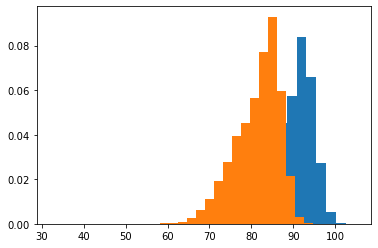

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(x  = Df_Merged['start_speed'], density = True, bins = 30)
plt.hist(x  = Df_Merged['end_speed'], density = True, bins = 30)


In [9]:
Df_Merged['zone'].unique()

array([ 3.,  5.,  1., 13.,  6.,  7., 14., 11.,  9.,  2.,  8.,  4., 12.,
       nan])

In [10]:
len(Df_Merged)

2867154

## Cleaning

In [11]:
Df_Merged.dropna(subset = ['zone'], inplace = True)
Df_Merged.loc[Df_Merged['code'].isna(),['code']] = 'Unknown'
Df_Merged.isna().sum()

# TODO1: Look at extreme values 
# TODO2: Aggregate data to some levels
# TODO3: Correlations - looking at histograms
# TODO4: Add commentary for possible feature engineering

ab_id               0
type                0
b_count             0
s_count             0
outs                0
pitch_type          0
pitch_num           0
spin_rate           0
start_speed         0
end_speed           0
code                0
zone                0
event               0
g_id                0
inning              0
o                   0
p_score             0
p_throws            0
stand               0
top                 0
attendance          0
venue_name          0
date                0
start_time          0
elapsed_time        0
delay               0
weather             0
wind                0
away_team           0
home_team           0
away_final_score    0
home_final_score    0
dtype: int64

In [12]:
# Aggregation -> To per Game -> 9711 & game situations i.e. type, b_count, s_count, outs, pitch_type
for col in ['type','b_count','s_count','outs','pitch_type']:
    print(Df_Merged[col].unique())
    print(len(Df_Merged[col].unique()))
# Pitch_Type -> Coerce  
 # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 


['S' 'B' 'X']
3
[0. 1. 2. 3. 4.]
5
[0. 1. 2.]
3
[0. 1. 2.]
3
['FF' 'CU' 'FC' 'SI' 'CH' 'FT' 'IN' 'SL' 'KC' 'EP' 'FS' 'FO' 'PO' 'KN'
 'UN' 'SC' 'FA' 'AB']
18


In [13]:
# FF = FT -> Fastball
# FO = PO -> Pitchout
# TO coerce to 'Other': IN, EP, FO, PO, SC, UN, AB, FA

df = Df_Merged.copy()
df['pitch_type'][df['pitch_type'] == 'FT' ] = 'FF'
df['pitch_type'][df['pitch_type'] == 'FO' ] = 'PO'
df['pitch_type'][(df['pitch_type']=='IN') | (df['pitch_type']=='EP') | (df['pitch_type']=='FO') | (df['pitch_type']=='PO') | (df['pitch_type']=='SC') | (df['pitch_type']=='UN') | (df['pitch_type']=='AB') | (df['pitch_type']=='FA') ] = 'Other'

df.groupby(['pitch_type']).size().sort_values(ascending=False)

<ipython-input-13-06e0308d93dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][df['pitch_type'] == 'FT' ] = 'FF'
<ipython-input-13-06e0308d93dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][df['pitch_type'] == 'FO' ] = 'PO'
<ipython-input-13-06e0308d93dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_type'][(df['pitch_type']=='IN') | (df['pitch_type']=='EP') | (df['pitch_type']=='FO'

pitch_type
FF       1352860
SL        450578
CH        292789
SI        242504
CU        234391
FC        149756
KC         66484
FS         43705
KN         11260
Other       8638
dtype: int64

In [14]:
# Get Wind speed in MpH & Weather in Fahrenheit
wind_mph = []
for i in df['wind'][0:]:
    wind_speed = int(i[:2])
    wind_mph.append(wind_speed)

weather_fhr = []
for i in df['weather'][0:]:
    weather_F = int(i[:3])
    weather_fhr.append(weather_F)

df['wind'] = wind_mph 
df['weather'] = weather_fhr
#df

b_count


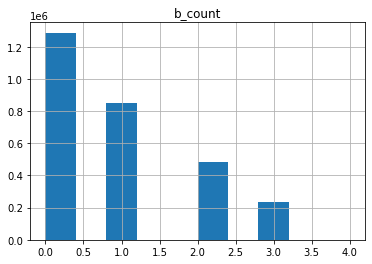

s_count


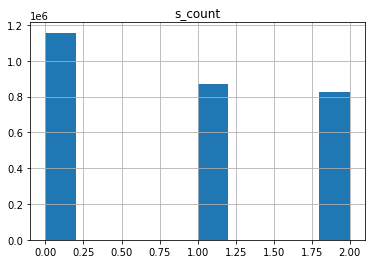

outs


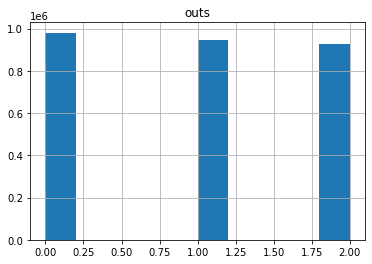

pitch_num


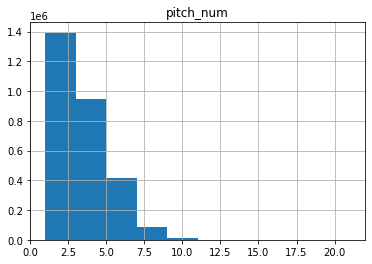

spin_rate


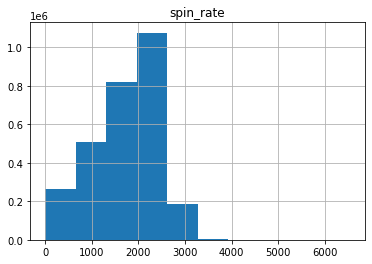

start_speed


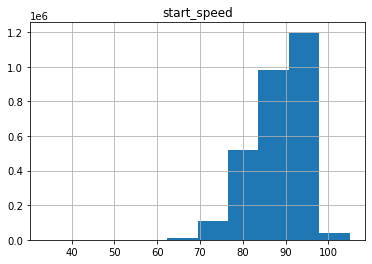

end_speed


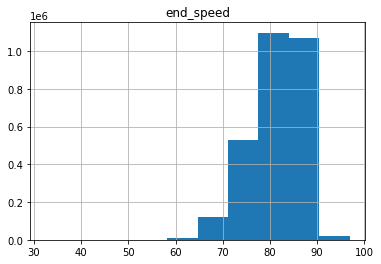

zone


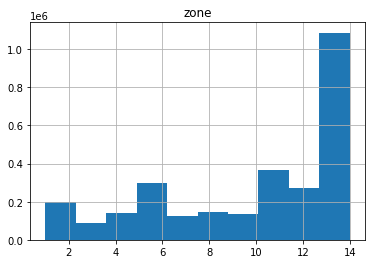

g_id


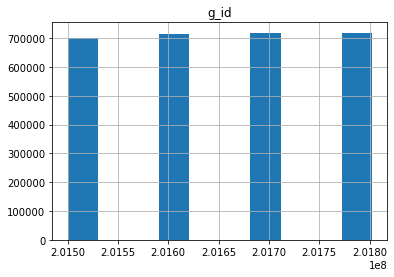

inning


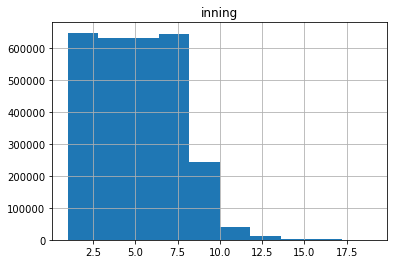

o


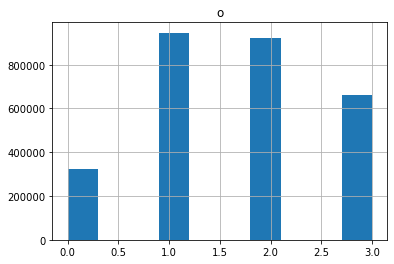

p_score


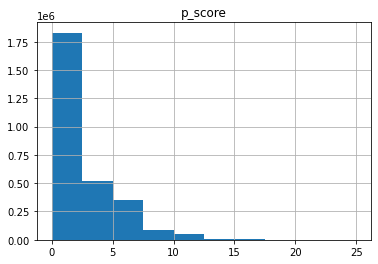

attendance


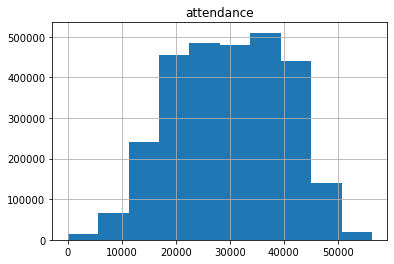

elapsed_time


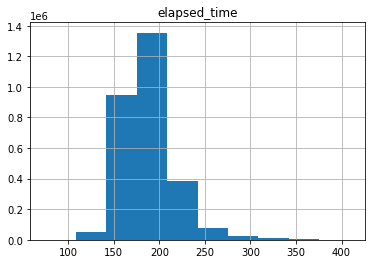

delay


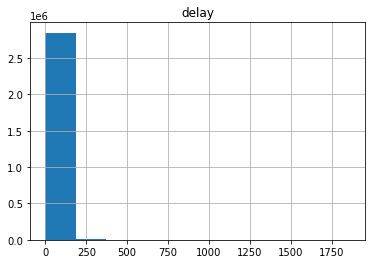

weather


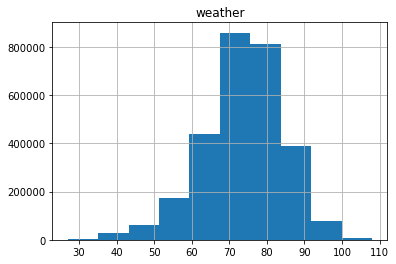

wind


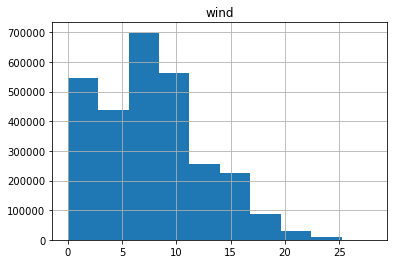

In [15]:
# EDA: Basic histogram of all vars w 1 loop
import matplotlib.pyplot as plt
%matplotlib inline

ColNames = df.columns.tolist()[1:-4]
vector = range(1,len(ColNames),1)

for i in vector:
    if df[ColNames[i]].dtypes == 'float64':
        print(ColNames[i])
        df.hist(ColNames[i])
    elif df[ColNames[i]].dtypes == 'int64':
        print(ColNames[i])
        df.hist(ColNames[i])
    plt.show()

# Skewness: p_score, delay -> maybe for Q2 with API weather data

In [16]:
df_grouped = df.groupby(['g_id','b_count','s_count','outs','inning','wind','weather','venue_name','pitch_type']).mean().reset_index()
from scipy.stats import pearsonr

In [47]:
# Possible Question 1s to answer: 
    # (How) Does pitch tendency change with games situation 
        # Filter data by year if needed -> g_id first 4 digits
        
# Correlation Matrix:
    # keep float / int columns
    
ColNames = df_grouped.columns.tolist()
vector = range(1,len(ColNames),1)

X_var = []
Y_var = []
Correl = []

for i in vector:
    for j in vector:
        if (df_grouped[ColNames[i]].dtypes == 'float64') & (df_grouped[ColNames[j]].dtypes == 'float64'):
            X_var.append(ColNames[i])
            Y_var.append(ColNames[j])
            Cor = round(pearsonr(df_grouped[ColNames[i]], df_grouped[ColNames[j]])[0],4)
            Correl.append(Cor)

Correls = pd.DataFrame({'X_var':X_var,
                        'Y_var':Y_var,
                        'Correl':Correl})
Correls['Correl_Abs'] = abs(Correls['Correl'])

In [44]:
Correls[(Correls['Correl_Abs'] != 1) & (Correls['Correl_Abs'] >= 0.4)].sort_values(by = 'Correl_Abs', ascending = False)

# Start-End speed fairly obviously related -> % / Abs.value drop in speed good target variable for weather-related Q2
# Pitch_Nr & bat / Strike count - fairly obvious -> more balls thrown = more balls hit/striked
# Spin_Rate & Ball Speed - most interesting finding so far -> solid question: how does it correlate with drop in ball_speed

,X_var,Y_var,Correl,Correl_Abs
109,start_speed,end_speed,0.9885,0.9885
125,end_speed,start_speed,0.9885,0.9885
43,outs,o,0.8660,0.8660
155,o,outs,0.8660,0.8660
4,b_count,pitch_num,0.8049,0.8049
68,pitch_num,b_count,0.8049,0.8049
21,s_count,pitch_num,0.7744,0.7744
69,pitch_num,s_count,0.7744,0.7744
91,spin_rate,start_speed,0.5486,0.5486
107,start_speed,spin_rate,0.5486,0.5486


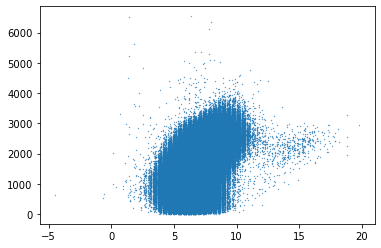

In [57]:
df_grouped['speed_drop'] = df_grouped['start_speed'] - df_grouped['end_speed']
#df_grouped.hist('speed_drop')
#round(pearsonr(df_grouped['speed_drop'], df_grouped['spin_rate'])[0],4)

plt.scatter(df_grouped['speed_drop'], df_grouped['spin_rate'], s= 0.1)
plt.show()

weather


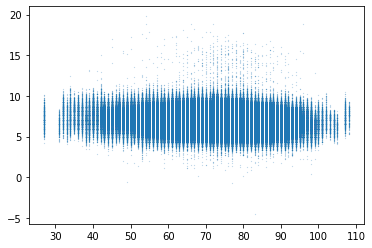

wind


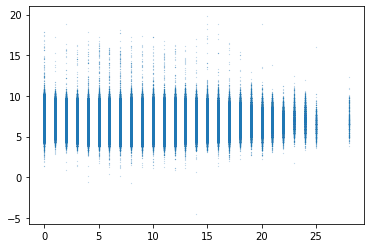

spin_rate


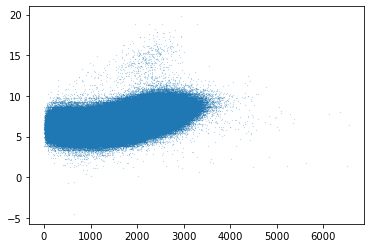

start_speed


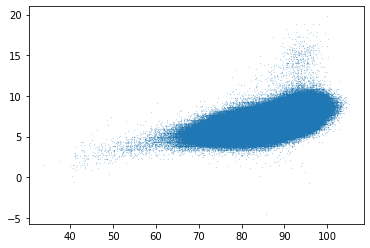

In [59]:
# LEt us check speed drop vs weather, wind, spin_rate, start_speed
for i in ['weather','wind','spin_rate','start_speed']:
    print(i)
    plt.scatter(df_grouped[i],df_grouped['speed_drop'], s=0.01)
    plt.show()


In [45]:
Df_Merged.groupby('pitch_type').size().sort_values(ascending=False)
 # type        - Pitch Type: CH=Changeup, CU=Curveball, EP=Eephus*, FC=Cutter, FF=Four-seam Fastball, FO=Pitchout (or PO)
                            #  FS=Splitter, FT=2-seam Fastball, IN=Intentional ball, KC=Knuckle curve, KN=Knuckeball, 
                            #  PO=Pitchout (or FO), SC=Screwball, SI=Sinker, SL=Slider,UN=Unknown
            # Some occur rarely -> decrease factors to 3-5 most-frequent + 'Others' 

# FF = FT -> Fastball
# SL
# CH
# SI
# CU
# FO = PO -> Pitchout

pitch_type
FF    1014877
SL     450578
FT     337983
CH     292789
SI     242504
CU     234391
FC     149756
KC      66484
FS      43705
KN      11260
IN       6197
EP        815
FO        810
PO        628
SC        113
UN         57
FA          9
AB          9
dtype: int64